In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youth-tobacco-surv/GYTS4.xls


# Global Youth Tobacco Survey

In [4]:
import pandas as pd
df = pd.read_excel("/kaggle/input/youth-tobacco-surv/GYTS4.xls")


In [5]:
print("Initial Data Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 59 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   State/UT                                                                                                                               108 non-null    object 
 1   Area                                                                                                                                   108 non-null    object 
 2   Ever tobacco users (%)                                                                                                                 108 non-null    float64
 3   Current tobacco users (%)                          

In [6]:
df = df.dropna(axis=1, how="all")  # Drop completely empty columns
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]  # Drop unnamed columns

In [7]:
df

,State/UT,Area,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other people’s tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed ‘tobacco-free school’ guidelines (%),Schools aware of the policy for displaying ‘tobacco-free school’ board (%)
0,India,Total,18.1,8.5,11.0,7.3,4.6,2.6,4.1,2.1,...,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
1,India,Urban,13.5,5.5,8.1,4.5,4.1,2.3,3.7,1.9,...,16.3,34.1,30.1,73.3,64.8,67.4,86.9,36.4,82.4,83.0
2,India,Rural,19.5,9.4,11.8,8.1,4.7,2.6,4.3,2.2,...,17.8,38.9,24.8,69.8,56.1,58.6,84.6,39.2,81.9,82.2
3,Andaman and Nicobar Islands,Total,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
4,Andaman and Nicobar Islands,Urban,13.3,3.4,6.5,2.6,3.7,1.3,2.0,0.7,...,20.2,25.7,26.9,66.6,65.1,60.9,89.1,0.0,85.3,42.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Uttarakhand,Urban,39.5,25.7,35.9,24.8,19.4,9.7,22.2,7.7,...,22.4,35.3,35.4,67.7,60.6,67.4,42.9,0.0,42.9,57.1
104,Uttarakhand,Rural,28.2,15.7,22.9,14.2,10.7,6.3,11.3,4.8,...,14.4,24.4,21.5,61.7,46.9,52.2,52.4,19.1,76.2,61.9
105,West Bengal,Total,17.3,7.1,9.3,5.2,5.4,3.6,5.5,2.9,...,21.0,25.1,19.9,73.7,48.1,49.3,94.3,65.7,85.7,91.4
106,West Bengal,Urban,18.0,6.9,9.1,4.1,5.0,2.2,2.9,1.4,...,23.4,39.3,26.3,74.1,74.8,74.1,85.7,57.1,71.4,71.4


In [8]:
df = df.fillna(method="ffill")

<ipython-input-8-7ae71642fbdb>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


In [9]:
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [10]:
df = df.drop_duplicates()

## EDA

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Basic Statistics:
       State/UT  Area  Ever tobacco users (%)  Current tobacco users (%)  \
count       0.0   0.0              108.000000                 108.000000   
mean        NaN   NaN               22.714815                  11.322222   
std         NaN   NaN               19.291991                  14.848665   
min         NaN   NaN                0.100000                   0.000000   
25%         NaN   NaN               10.700000                   3.275000   
50%         NaN   NaN               15.300000                   5.500000   
75%         NaN   NaN               26.050000                   8.525000   
max         NaN   NaN               91.100000                  69.200000   

       Ever tobacco smokers (%)  Current tobacco smokers (%)  \
count                108.000000                   108.000000   
mean                  14.800926                     9.061111   
std                   17.055963                    12.116590   
min                    0.100000         

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


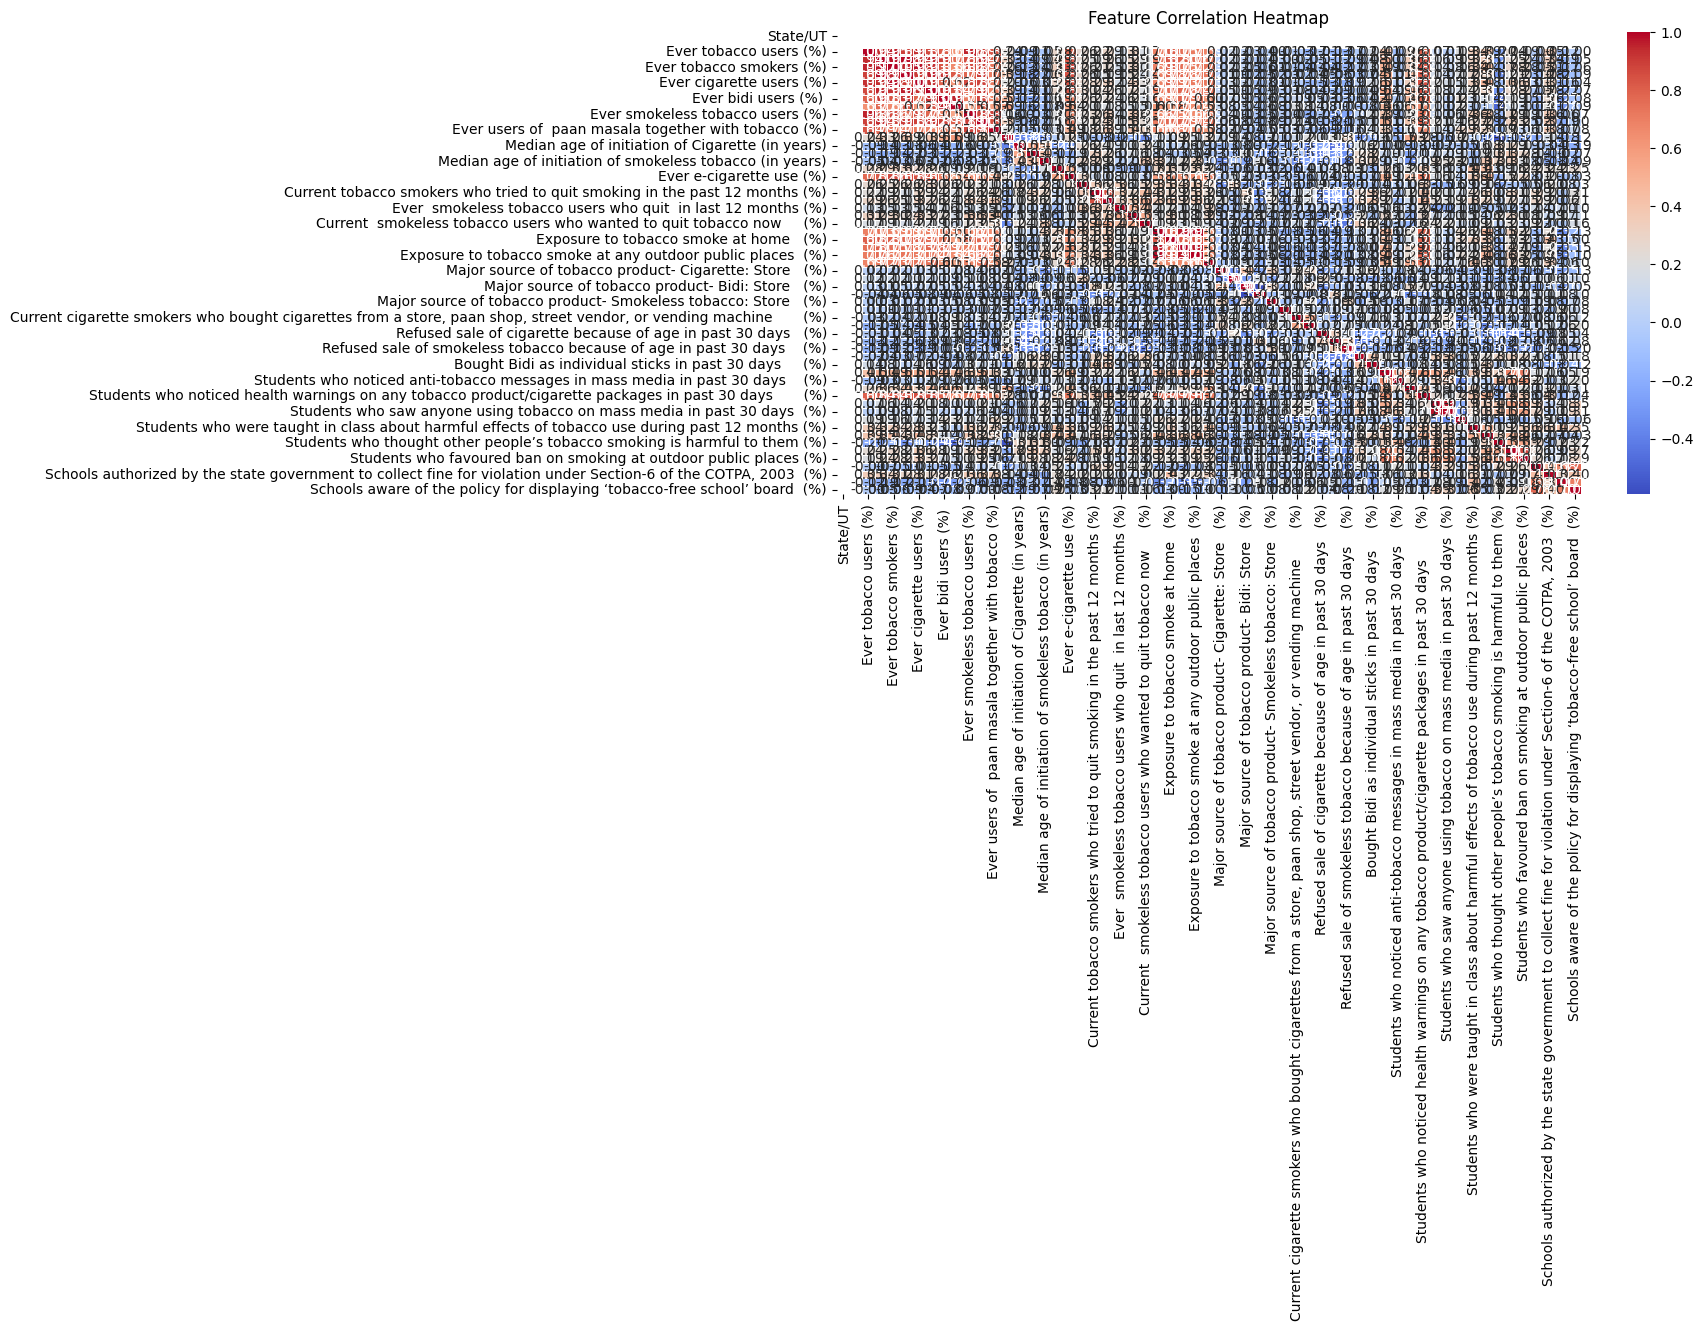

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

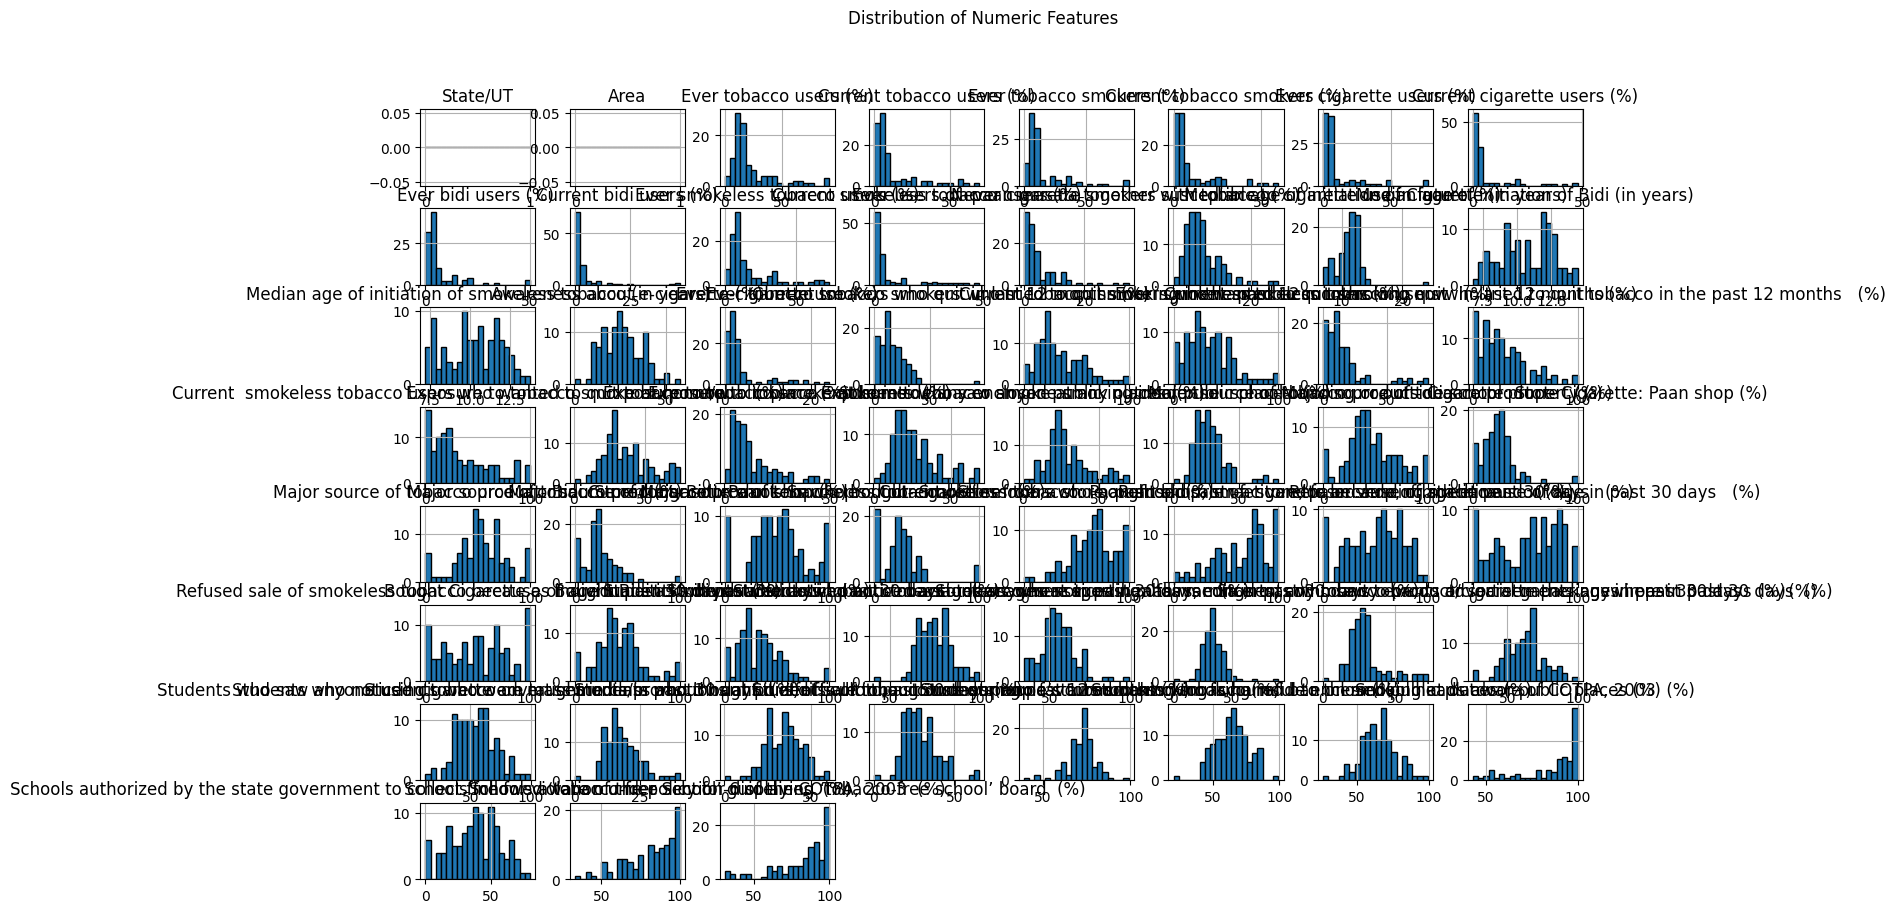

In [13]:
# Distribution of numeric columns
df.hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numeric Features")
plt.show()